In [32]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease



In [33]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_english = stopwords.words ("english") + list(punctuation)

In [43]:
df = pd.read_csv("dataclean2.csv")
df.head()

,Unnamed: 0,userid,clean,post,ques,ans,asker,ans1,severity1 LOW,bully1,...,severity2 Middle,bully2,ans3,severity3 hight,bully3,tokenized_post,lowered_tokenized_post,stop_words_lower_tokenized_post,filtered_tokenized_post,stemmed_post
0,2672,h0ttb0i,q fuk m3 n dh ah0l3bra hell no,Q: fU(K m3 !N dH@ A$$H0l3<br>A: hell no !!!,fU(K m3 !N dH@ A$$H0l3,hell no !!!,None,Yes,5.0,A$$H0l3,...,7.0,fU(K m3 !N dH@ A$$H0l3,No,0.0,NaN,"['Q', ':', 'fU', '(', 'K', 'm3', '!', 'N', 'dH...","['q', ':', 'fu', '(', 'k', 'm3', '!', 'n', 'dh...","['q', ':', 'fu', '(', 'k', 'm3', '!', 'n', 'dh...","['h0l3', 'hell']","['h0l3', 'hell']"
1,2602,dearalexiis,q yhuuu ready to get yhur a beat this saturday...,Q: YHUUU READY TO GET YHUR A$$ BEat THIS SATuR...,YHUUU READY TO GET YHUR A$$ BEat THIS SATuRDAY...,You can try but it won't happen.. I don't kno...,tootsybbygarl,Yes,10.0,READY TO GET YHUR A$$ BEat THIS SATuRDAYY,...,8.0,ugly bitchessss,Yes,8.0,GET YHUR A$$ BEat,"['Q', ':', 'YHUUU', 'READY', 'TO', 'GET', 'YHU...","['q', ':', 'yhuuu', 'ready', 'to', 'get', 'yhu...","['q', ':', 'yhuuu', 'ready', 'get', 'yhur', '$...","['yhuuu', 'ready', 'get', 'yhur', 'beat', 'sat...","['yhuuu', 'ready', 'get', 'yhur', 'beat', 'sat..."
2,9040,kellyblake1,q omg you was on skins reeeets i mean i actual...,Q: OMG YOU WAS ON SKINS REEEETS? I MEAN I ACTU...,OMG YOU WAS ON SKINS REEEETS? I MEAN I ACTUALL...,Taking the piss much? :P,None,Yes,1.0,MEAN I ACTUALLY SAW YOU JIZZZ MUCH,...,0.0,NaN,No,0.0,NaN,"['Q', ':', 'OMG', 'YOU', 'WAS', 'ON', 'SKINS',...","['q', ':', 'omg', 'you', 'was', 'on', 'skins',...","['q', ':', 'omg', 'skins', 'reeeets', 'mean', ...","['omg', 'skins', 'reeeets', 'mean', 'actually'...","['omg', 'skin', 'reeeets', 'mean', 'actually',..."
3,5417,zooshay,q how big of a flirt are youbra not a flirt at...,Q: How big of a flirt are you?<br>A: not a fli...,How big of a flirt are you?,not a flirt at all lmao shut up,Trebla1,Yes,1.0,shut up,...,0.0,NaN,No,0.0,NaN,"['Q', ':', 'How', 'big', 'of', 'a', 'flirt', '...","['q', ':', 'how', 'big', 'of', 'a', 'flirt', '...","['q', ':', 'big', 'flirt', '<', 'br', '>', ':'...","['big', 'flirt', 'flirt', 'lmao', 'shut']","['big', 'flirt', 'flirt', 'lmao', 'shut']"
4,2823,h0ttb0i,q y when you suckd my dog up you was chokin an...,Q: y when you suckd my dog up you was chokin a...,y when you suckd my dog up you was chokin and ...,lmfao who da hell is diz wtf yew stopid [[neva...,None,Yes,4.0,when you suckd my dog up you was chokin and shit,...,0.0,NaN,No,0.0,NaN,"['Q', ':', 'y', 'when', 'you', 'suckd', 'my', ...","['q', ':', 'y', 'when', 'you', 'suckd', 'my', ...","['q', ':', 'suckd', 'dog', 'chokin', 'shit', '...","['suckd', 'dog', 'chokin', 'shit', 'lmfao', 'h...","['suckd', 'dog', 'chokin', 'shit', 'lmfao', 'h..."


In [44]:
df.ans1.value_counts(normalize=True)

Yes    0.5
No     0.5
Name: ans1, dtype: float64

In [99]:
X = df.clean
y = df.ans1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
    

((1280,), (320,), (1280,), (320,))

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.feature_extraction.text import CountVectorizer

In [102]:
pipeline = Pipeline([
    ('prep', CountVectorizer(tokenizer=word_tokenize, stop_words=sw_english)),
    ('algo', SVC(max_iter=500))
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=12)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   27.1s finished
/Users/cindyrahayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/Users/cindyrahayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'algo__C': 555.270424852248, 'algo__gamma': 0.27274076717040735}
1.0 0.85546875 0.884375


In [48]:
from jcopml.plot import plot_confusion_matrix

recall: 0.878125
precission: 0.8928730873817929
f1-score: 0.8769703960015379


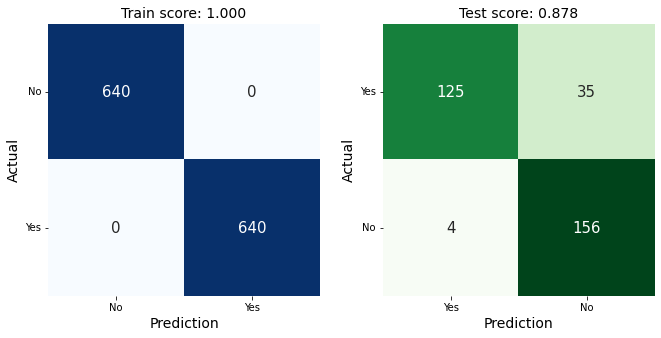

In [41]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = model.predict(X_test)

print('recall: {}'.format(recall_score(y_test, y_pred, average='weighted')))
print('precission: {}'.format(precision_score(y_test, y_pred, average='weighted')))
print('f1-score: {}'.format(f1_score(y_test, y_pred, average='weighted'))) 